## Measurements

In [13]:
# Input Libraries
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator, Aer
from qiskit import *
from qiskit.quantum_info import Statevector

import numpy as np

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


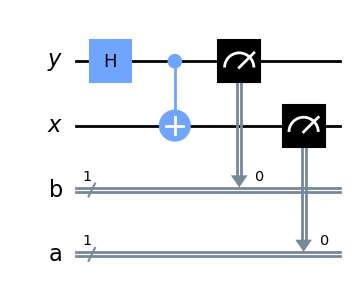

In [8]:
X = QuantumRegister(1, 'x')
Y = QuantumRegister(1, 'y')
A = ClassicalRegister(1, 'a')
B = ClassicalRegister(1, 'b')

circuit = QuantumCircuit(Y, X, B, A)    # X, Y are Qbits, and A, B are classical Bits

circuit.h(Y)
circuit.cx(Y, X)

simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend = simulator).result()
statevector = result.get_statevector()

print(statevector)

circuit.measure(Y, B)
circuit.measure(X, A)

circuit.draw(output= 'mpl')

#### Simulating above circuit for 1000 shots.

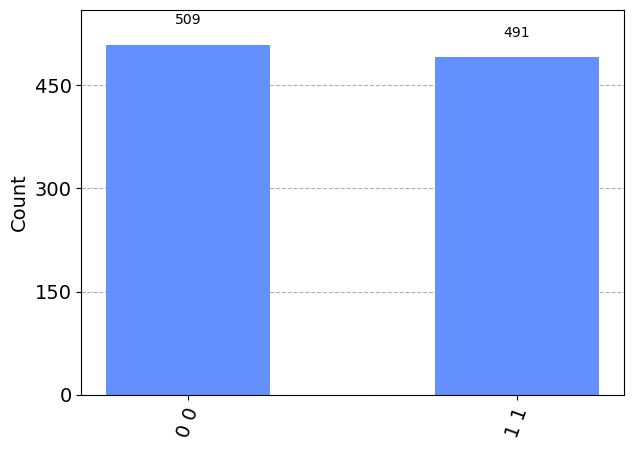

In [12]:
X = QuantumRegister(1, 'x')
Y = QuantumRegister(1, 'y')
A = ClassicalRegister(1, 'a')
B = ClassicalRegister(1, 'b')

circuit = QuantumCircuit(Y, X, B, A)    # X, Y are Qbits, and A, B are classical Bits

circuit.h(Y)
circuit.cx(Y, X)

circuit.measure(Y, B)
circuit.measure(X, A)

simulator = AerSimulator()

Circuit_simulator = simulator.run(transpile(circuit, simulator), shots = 1000)
Statistics = Circuit_simulator.result().get_counts()
plot_histogram(Statistics)

In [19]:
U = Statevector([1/np.sqrt(2), 1/np.sqrt(2)])
V = Statevector([(1+2.j)/ 3, - 2/3])
W = Statevector([1/np.sqrt(3), 1/np.sqrt(3), 1/np.sqrt(3)])

### performing probabilistic measurements 3000 times.

{'0': 1694, '1': 1306}

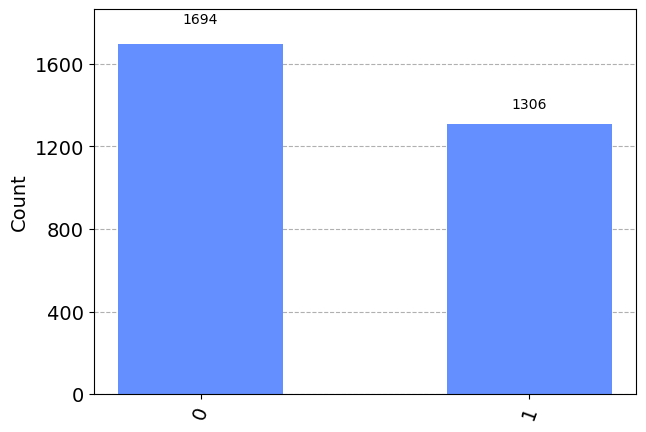

In [15]:
statistics = V.sample_counts(3000)

display(statistics)
plot_histogram(statistics)

{'0': 971, '1': 982, '2': 1047}

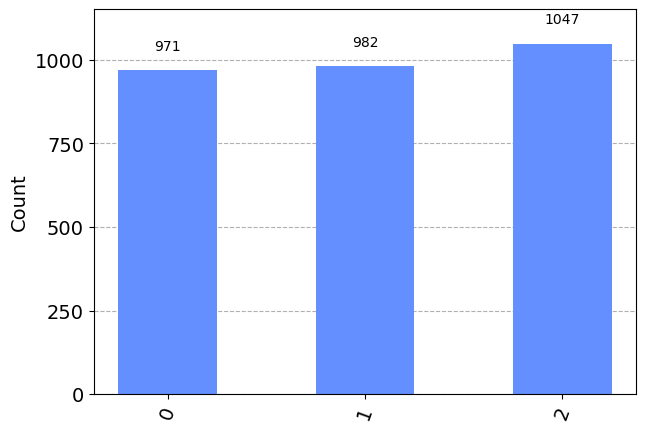

In [20]:
statistics = W.sample_counts(3000)

display(statistics)
plot_histogram(statistics)

Here, 0 --> |000>, 1 --> |001>, and 2--> |011>